<a href="https://colab.research.google.com/github/juancas9812/Inteligencia-Artificial-2020-3/blob/master/S5_Logistic_Regr_JCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pontificia Universidad Javeriana
# Inteligencia Artificial 2020-30
Tarea Semana 5

Juan Camilo Sarmiento Peñuela

**1.**  Implementar (adecuar) los dos métodos descritos en:​ https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html#id13 ​ Con los datos en el csv en teams en la carpeta semana 5 (datos_multivariados.csv).​ Puede descargar el código también en el github del autor, pero por favor leer primero el link de arriba. https://github.com/bfortuner/ml-glossary ​

*   Primer método - Regresión Logística Binaria:


> Primero se importan los módulos que se van a utilizar, los cuales son numpy para poder hacer uso de vectores y matrices, pandas para obtener los datos, y matplotlib para los graficos. Luego, se copian las funciones que se encuentran en el primer link, y se ajustan para que funcionen con el interprete de python 3, dado que estan escritas para python 2.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))

In [ ]:
def predict(features, weights):
  z = np.dot(features,weights)
  return sigmoid(z)

In [ ]:
def cost_function(features, labels, weights):
    '''
    Using Mean Absolute Error

    Features:(100,3)
    Labels: (100,1)
    Weights:(3,1)
    Returns 1D matrix of predictions
    Cost = (labels*log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum() / observations

    return cost

In [ ]:
def update_weights(features, labels, weights, lr):
    '''
    Vectorized Gradient Descent

    Features:(200, 3)
    Labels: (200, 1)
    Weights:(3, 1)
    '''
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)

    #2 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  cost matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(features.T,  predictions - labels)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    #5 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights

In [ ]:
def decision_boundary(prob):
  return 1 if prob >= .5 else 0

In [ ]:
def classify(predictions):
  '''
  input  - N element array of predictions between 0 and 1
  output - N element array of 0s (False) and 1s (True)
  '''
  decision_boundary_vec = np.vectorize(decision_boundary)
  return decision_boundary_vec(predictions).flatten()

In [ ]:
def train(features, labels, weights, lr, iters):
    cost_history = []

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)


    return weights, cost_history

In [ ]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

In [ ]:
def plot_decision_boundary(trues, falses):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    no_of_preds = len(trues) + len(falses)

    ax.scatter([i for i in range(len(trues))], trues, s=25, c='b', marker="o", label='Trues')
    ax.scatter([i for i in range(len(falses))], falses, s=25, c='r', marker="s", label='Falses')

    plt.legend(loc='upper right');
    ax.set_title("Decision Boundary")
    ax.set_xlabel('N/2')
    ax.set_ylabel('Predicted Probability')
    plt.axhline(.5, color='black')
    plt.show()

>Luego de tener todas las funciones, se procede a leer los datos del archivo data_classification.csv, y se implementan las funciones

[-16.1602695    1.74538164   1.48650834]
0.21700791641301476
0.4980000000000001


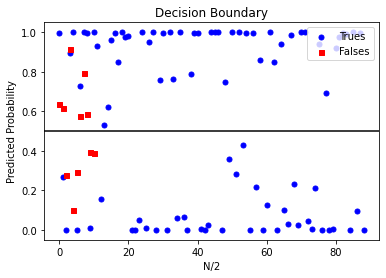

In [ ]:
data=pd.read_csv("data_classification.csv", sep=';',header=0)
arreglo=data.values
YCOL=2
Xb=arreglo[:,0:YCOL]
Xa=np.ones((len(Xb),1))
X=np.concatenate((Xa,Xb),axis=1)
Y=arreglo[:,YCOL]
YCOL2=5
thetas=np.array([-12.5, 1.3, 1])
Num_Iter=2500
alpha=0.5
cinit=112

features=X
labels=Y

for alpha in np.arange(0.4,0.5,0.001):
  weights, cost=train(X, Y, thetas, alpha, Num_Iter)
  if cost[-1]<cinit:
    final_w=weights
    cinit=cost[-1]
    alphaopt=alpha

print(final_w)
print(cinit)
print(alphaopt)

count_true=0
count_false=0
acum=predict(X,final_w)  
prob=classify(acum)
trues=[]
falses=[]
for i in np.arange(0,acum.size):
  if prob[i]==Y[i]:
    trues.append(acum[i]) 
    
  else:
    falses.append(acum[i]) 

plot_decision_boundary(trues,falses)

*   Segundo Método - Regresión logística multiclase:

> Para este método se nececita importar algunos modulos de scikit-learn, debido a que se usa este modulo para la implementación de este método

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

> Ahora se hace la implementación:

In [ ]:
# Normalize grades to values between 0 and 1 for more efficient computation
normalized_range = sklearn.preprocessing.MinMaxScaler(feature_range=(-1,1))

# Extract Features + Labels
labels.shape =  (100,) #scikit expects this
features = normalized_range.fit_transform(features)

# Create Test/Train
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size=0.4,random_state=0)

# Scikit Logistic Regression
scikit_log_reg = LogisticRegression()
scikit_log_reg.fit(features_train,labels_train)

#Score is Mean Accuracy
scikit_score = scikit_log_reg.predict(features_test)
precision=accuracy(scikit_score,labels_test)*100
print('Scikit score: ', precision)

#Our Mean Accuracy
probabilities = predict(features, weights).flatten()
classifications = classify(probabilities)
our_acc = accuracy(classifications,labels.flatten())
print('Our score: ',our_acc)

Scikit score:  90.0
Our score:  0.55


**2.**   Correr el ejemplo multiclase al final de:​ https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html ​, comentar el uso y entradas de cada función que hagan uso de sklearn​




In [ ]:
#Se importa el dataset de Iris que se encuentra en en sklearn.datasets
from sklearn.datasets import load_iris 

#Se importa la función para realizar la regresión logística. Se encuentra en 
#sklearn.linear_model
from sklearn.linear_model import LogisticRegression


X, y = load_iris(return_X_y=True) #Se cargan las etiquetas del dataset
clf = LogisticRegression(random_state=0).fit(X, y) #Se entrena el modelo de la regresión logística
clf.predict(X[:2, :]) #Hace la predicción sobre cuál etiqueta pertenece cuál caracteristica
clf.predict_proba(X[:2, :]) #Retorna la matriz de probabilidades
clf.score(X, y) #Se calcula el valor de la exactitud obtenida por la regresión

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9733333333333334

**3.** Encontrar la derivada de J para un theta cualquiera de la Regresión Logística. Usarla para confirmar las ecuaciones de descenso del gradiente en las presentaciones.

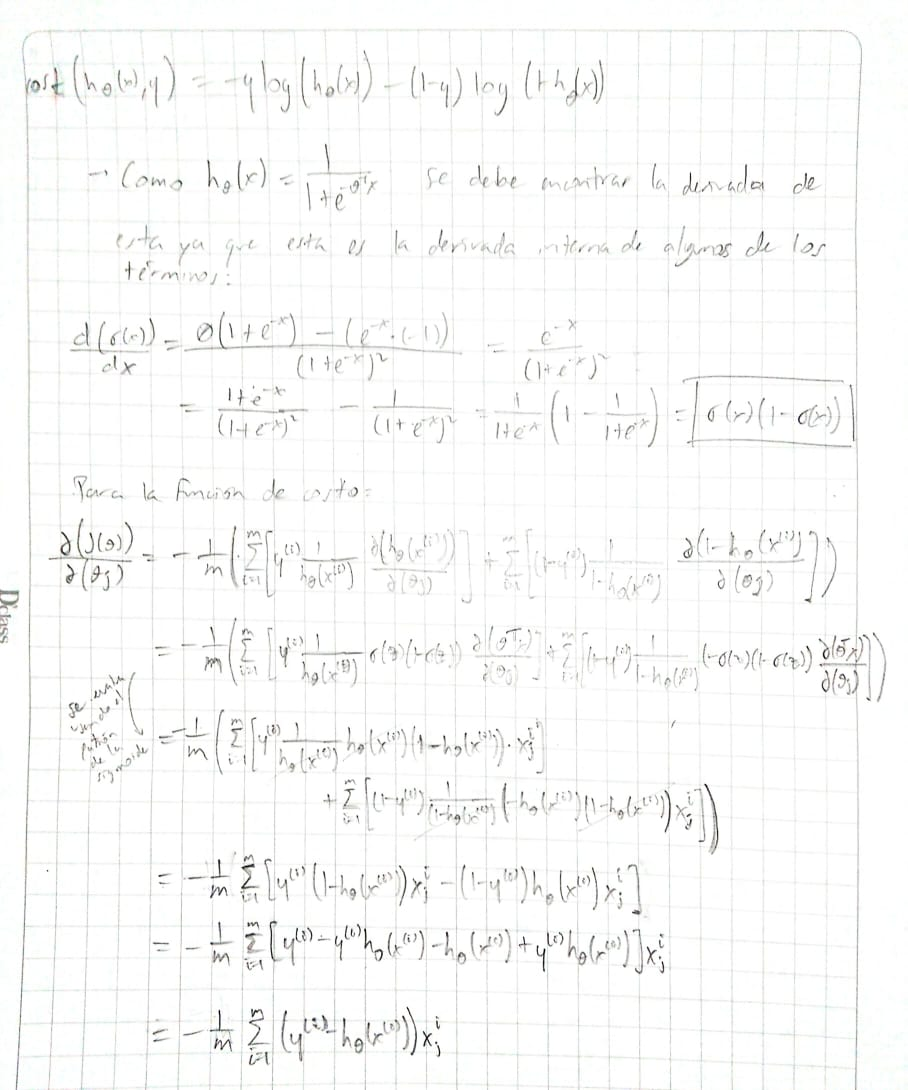

 

---




# Conclusiones

*   Se encontraron problemas al intentar importar y usar los datos. Por esto se recomienda ver el tipo de dato y en caso de ser posible la forma, ya que se va a trabajar con matrices y vectores.

*   Asimismo, es importante revisar el tipo de dato que se requiere para utilizar ciertos métodos para las clases que utilizan los diferentes módulos.

*   En el caso de la regresión logística binaria, como se estaba usando el descenso del gradiente, se encuentra que al cambiar los valores de los thetas, se converge siempre a los mismos valores de los pesos y del alpha, los cuales son [-16.1602695    1.74538164   1.48650834] y 0.4980000000000001 respectivamente